In [1]:
# impport libriaries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

### Data loading and Preprocessing

In [2]:
# read the data
df = pd.read_csv(r'Movies.csv')
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [3]:
pd.set_option('display.max_rows',None)

In [4]:
# check any missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,(pct_missing*100)))

name - 0.0%
rating - 1.004173187271779%
genre - 0.0%
year - 0.0%
released - 0.02608242044861763%
score - 0.03912363067292645%
votes - 0.03912363067292645%
director - 0.0%
writer - 0.03912363067292645%
star - 0.013041210224308816%
country - 0.03912363067292645%
budget - 28.31246739697444%
gross - 2.464788732394366%
company - 0.2217005738132499%
runtime - 0.05216484089723526%


In [5]:
df.dropna(subset=['budget', 'gross','gross','votes'], inplace = True)

In [6]:
df.shape

(5436, 15)

In [7]:
# data type for each columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
# change data types for columns 
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')

In [9]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score    votes         director  \
0  June 13, 1980 (United States)    8.4   927000  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime  
0   46998772        Warner Bros.    146.0  
1   58853106   Columbia Pictures    104.0  
2  538375067           Lucasfilm    124.0  
3   83453539  Paramount Pictures     88.0  
4   39846344      Orion Pictures     98.0

<AxesSubplot:>

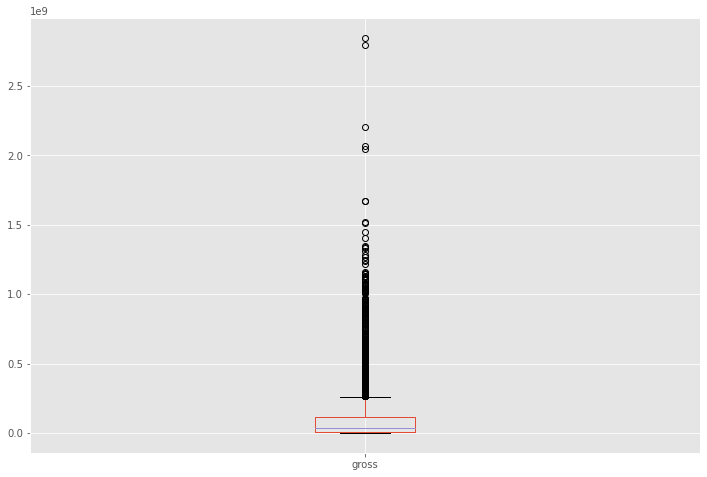

In [10]:
# check the outliers
df.boxplot(column=['gross'])

In [16]:
# drop duplicate
df.drop_duplicates()

name  rating  genre  year  released  score    votes  director  writer  \
5445   387       5      0  2009       528    7.8  1100000       787    1265   
7445   389       5      0  2019       138    8.4   903000       106     515   
3045  4923       5      6  1997       535    7.8  1100000       787    1265   
6663  3656       5      0  2015       530    7.8   876000       770    1810   
7244   390       5      0  2018       146    8.4   897000       106     515   
7480  4402       4      2  2019      1130    6.9   222000      1014    1364   
6653  2125       5      0  2015      1307    7.0   593000       337    2530   
6043  3891       5      0  2012      1905    8.0  1300000      1062    1650   
6646  1545       5      0  2015       166    7.1   370000       811     483   
7494  1534       4      2  2019      2059    6.8   148000       279    1386   
6644   388       5      0  2015      1717    7.3   777000      1062    1650   
7247   568       5      0  2018       725    7.3   661000      1721    2694   
5845  1736       5      1  2011      1096    8.1   790000       454    2871   
7075  3657       5      0  2017       501    7.0   581000      1592    2494   
7271  2126       5      0  2018      1388    6.2   277000       766     779   
6262  1533       4      2  2013      2088    7.4   585000       279    1386   
7072   478       4      7  2017      1566    7.1   283000       156    2831   
7281  1973       4      2  2018      1329    7.6   263000       194     328   
7055  4133       5      0  2017        45    6.6   214000       569    1015   
6244  2021       5      0  2013      1886    7.1   779000      1772     839   
6688  2554       4      2  2015      1054    6.4   218000      1146     363   
6846   752       5      0  2016      1916    7.8   694000       106     515   
7250   344       5      0  2018       566    6.9   404000       811     701   
4245  4421       5      0  2003       517    8.9  1700000      1523    1240   
7458  3608       5      0  2019      1140    7.5   359000      1021     481   
7456   757       5      0  2019      1702    6.8   478000        97     182   
5878  4964       5      0  2011      1446    6.2   390000      1305     888   
6059  3511       5      0  2012      2154    7.7   642000      1737    2227   
6494  4963       5      0  2014      1428    5.6   302000      1305     888   
2448  4402       1      2  1994      1398    8.5   970000      1690    1208   
6047  4062       5      0  2012      1148    8.4  1600000       319    1610   
7463  3653       5      0  2019       554    6.5   394000       770     491   
7450  2099       6      5  2019      2327    8.4  1000000      1943    3008   
7488  4950       1      2  2019      1376    7.7   217000      1054    1528   
5685  4949       1      2  2010      1349    8.2   776000      1164    1528   
4852  2997       5      0  2006      1259    7.3   668000       676    2937   
6869  3273       5      0  2016       510    7.8   572000       617     494   
7481   207       4      1  2019      1842    6.9   239000       707    1471   
5860  3000       5      0  2011      1808    6.6   492000      1640    2937   
7140  1105       4      2  2017      1468    6.3   119000      1146     526   
2245  2123       5      0  1993      1296    8.1   894000      1864    2075   
6908  1415       4      2  2016      1343    7.3   250000        82     153   
3451  3650       4      0  1999      1783    6.5   748000       655    1048   
5667   216       4      1  2010      1684    6.4   392000      1924    1853   
6863  5344       4      2  2016      1678    8.0   450000       241     391   
6045  4254       5      1  2012       493    7.8   773000      1523     969   
3843  1741       4      1  2001      1993    7.6   685000       282    1238   
5243  4061       5      0  2008      1120    9.0  2400000       319    1610   
6311  1104       4      2  2013      1222    7.3   377000      1559     526   
6905  4336       4      1  2016        53    7.4   26400

### Find Correlation

In [17]:
df = df.sort_values(by=['gross'], inplace = False, ascending = False)

<AxesSubplot:xlabel='budget', ylabel='gross'>

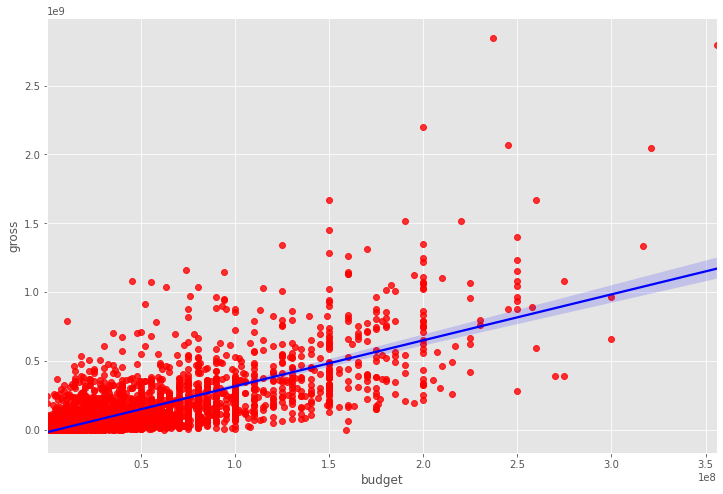

In [18]:
# plot budget vs gross
sns.regplot(x='budget', y='gross', data=df, scatter_kws = {'color':'red'}, line_kws = {'color': 'blue'})

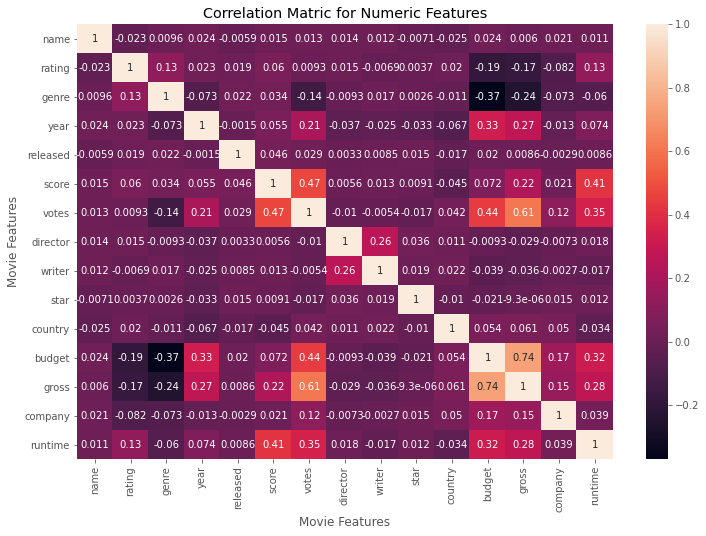

In [19]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [20]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

name  rating  genre  year  released  score    votes  director  writer  \
5445   387       5      0  2009       528    7.8  1100000       787    1265   
7445   389       5      0  2019       138    8.4   903000       106     515   
3045  4923       5      6  1997       535    7.8  1100000       787    1265   
6663  3656       5      0  2015       530    7.8   876000       770    1810   
7244   390       5      0  2018       146    8.4   897000       106     515   
7480  4402       4      2  2019      1130    6.9   222000      1014    1364   
6653  2125       5      0  2015      1307    7.0   593000       337    2530   
6043  3891       5      0  2012      1905    8.0  1300000      1062    1650   
6646  1545       5      0  2015       166    7.1   370000       811     483   
7494  1534       4      2  2019      2059    6.8   148000       279    1386   
6644   388       5      0  2015      1717    7.3   777000      1062    1650   
7247   568       5      0  2018       725    7.3   661000      1721    2694   
5845  1736       5      1  2011      1096    8.1   790000       454    2871   
7075  3657       5      0  2017       501    7.0   581000      1592    2494   
7271  2126       5      0  2018      1388    6.2   277000       766     779   
6262  1533       4      2  2013      2088    7.4   585000       279    1386   
7072   478       4      7  2017      1566    7.1   283000       156    2831   
7281  1973       4      2  2018      1329    7.6   263000       194     328   
7055  4133       5      0  2017        45    6.6   214000       569    1015   
6244  2021       5      0  2013      1886    7.1   779000      1772     839   
6688  2554       4      2  2015      1054    6.4   218000      1146     363   
6846   752       5      0  2016      1916    7.8   694000       106     515   
7250   344       5      0  2018       566    6.9   404000       811     701   
4245  4421       5      0  2003       517    8.9  1700000      1523    1240   
7458  3608       5      0  2019      1140    7.5   359000      1021     481   
7456   757       5      0  2019      1702    6.8   478000        97     182   
5878  4964       5      0  2011      1446    6.2   390000      1305     888   
6059  3511       5      0  2012      2154    7.7   642000      1737    2227   
6494  4963       5      0  2014      1428    5.6   302000      1305     888   
2448  4402       1      2  1994      1398    8.5   970000      1690    1208   
6047  4062       5      0  2012      1148    8.4  1600000       319    1610   
7463  3653       5      0  2019       554    6.5   394000       770     491   
7450  2099       6      5  2019      2327    8.4  1000000      1943    3008   
7488  4950       1      2  2019      1376    7.7   217000      1054    1528   
5685  4949       1      2  2010      1349    8.2   776000      1164    1528   
4852  2997       5      0  2006      1259    7.3   668000       676    2937   
6869  3273       5      0  2016       510    7.8   572000       617     494   
7481   207       4      1  2019      1842    6.9   239000       707    1471   
5860  3000       5      0  2011      1808    6.6   492000      1640    2937   
7140  1105       4      2  2017      1468    6.3   119000      1146     526   
2245  2123       5      0  1993      1296    8.1   894000      1864    2075   
6908  1415       4      2  2016      1343    7.3   250000        82     153   
3451  3650       4      0  1999      1783    6.5   748000       655    1048   
5667   216       4      1  2010      1684    6.4   392000      1924    1853   
6863  5344       4      2  2016      1678    8.0   450000       241     391   
6045  4254       5      1  2012       493    7.8   773000      1523     969   
3843  1741       4      1  2001      1993    7.6   685000       282    1238   
5243  4061       5      0  2008      1120    9.0  2400000       319    1610   
6311  1104       4      2  2013      1222    7.3   377000      1559     526   
6905  4336       4      1  2016        53    7.4   26400

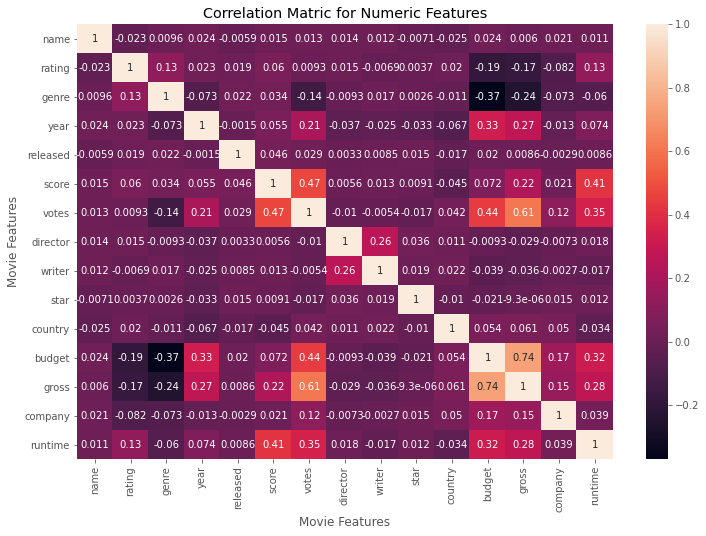

In [21]:
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [22]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name      name        1.000000
          rating     -0.023013
          genre       0.009617
          year        0.024435
          released   -0.005896
          score       0.014955
          votes       0.012915
          director    0.013699
          writer      0.011602
          star       -0.007109
          country    -0.024555
          budget      0.023698
          gross       0.005966
          company     0.021209
          runtime     0.010800
rating    name       -0.023013
          rating      1.000000
          genre       0.128102
          year        0.022668
          released    0.018836
          score       0.059550
          votes       0.009255
          director    0.014847
          writer     -0.006923
          star        0.003737
          country     0.020148
          budget     -0.186892
          gross      -0.168814
          company    -0.082189
          runtime     0.133239
genre     name        0.009617
          rating      0.128102
        

In [23]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre     budget     -0.368900
budget    genre      -0.368900
genre     gross      -0.244380
gross     genre      -0.244380
rating    budget     -0.186892
budget    rating     -0.186892
rating    gross      -0.168814
gross     rating     -0.168814
votes     genre      -0.136457
genre     votes      -0.136457
rating    company    -0.082189
company   rating     -0.082189
genre     company    -0.073293
company   genre      -0.073293
genre     year       -0.073026
year      genre      -0.073026
country   year       -0.066662
year      country    -0.066662
genre     runtime    -0.060186
runtime   genre      -0.060186
country   score      -0.044690
score     country    -0.044690
writer    budget     -0.039420
budget    writer     -0.039420
year      director   -0.036936
director  year       -0.036936
writer    gross      -0.035999
gross     writer     -0.035999
runtime   country    -0.033554
country   runtime    -0.033554
year      star       -0.032770
star      year       -0.032770
gross   

In [24]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross     votes       0.614904
votes     gross       0.614904
budget    gross       0.740395
gross     budget      0.740395
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

### Conclusion

#### votes and budget have the highest correlation to gross earnings